# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px


In [20]:

emp = pd.read_csv("emp.csv")

df = emp.copy()

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

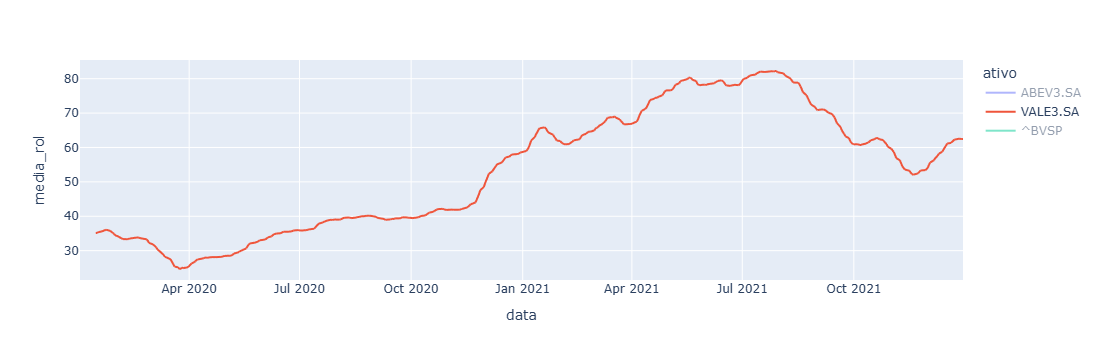

In [22]:
df["media_rol"] = df.groupby("ativo")["valor"].transform(lambda x: x.rolling(10).mean())

df.head()
fig = px.line(df, x="data", y="media_rol", color="ativo")
fig.show()

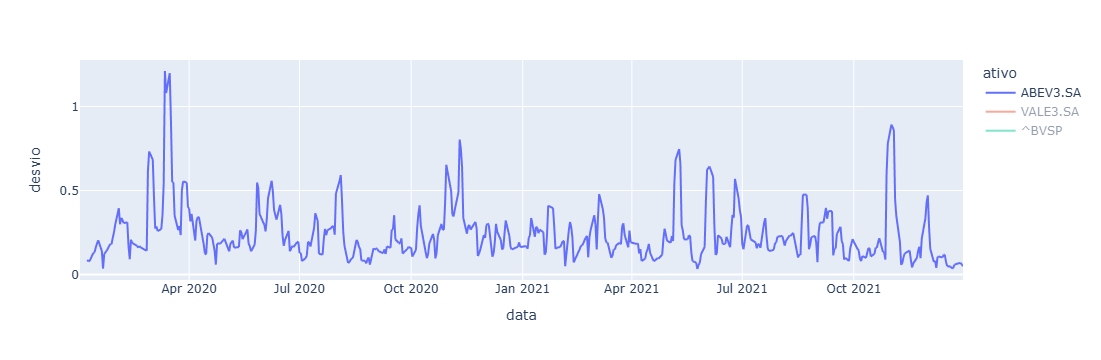

In [24]:
df["desvio"] = df.groupby("ativo")["valor"].transform(lambda x: x.rolling(5).std())


fig = px.line(df, x="data", y="desvio", color="ativo")
fig.show()

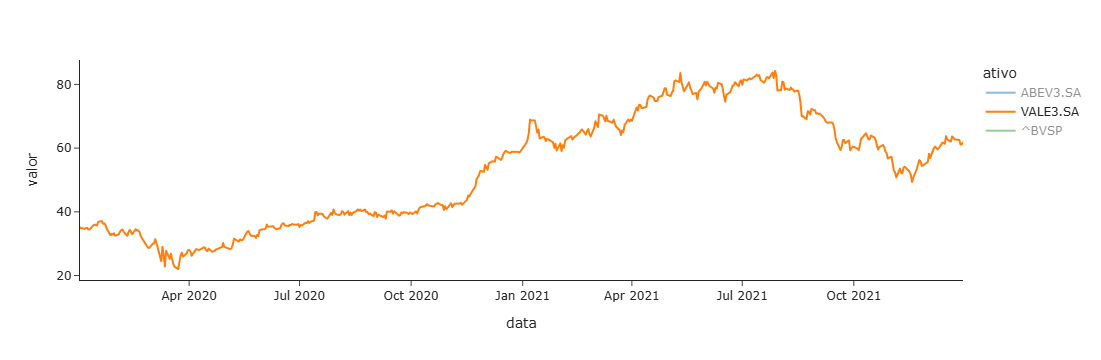

In [26]:
#grafico feito na atividade anterior
fig = px.line(emp,x = "data", y = "valor", color='ativo', template='simple_white')
fig.show()

# sim os graficos de desvio padrao estao explicando bastante os periodos com queda brusca.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [6]:

from pandas_datareader import data as web
import plotly.express as px
from plotly import graph_objects

import pandas as pd
import numpy as np



data      object
ativo     object
valor    float64
dtype: object


In [29]:
from datetime import datetime
import yfinance as yf

atv = ['^BVSP', 'VALE3.SA','ABEV3.SA']
dt_ini = '2020-01-01'
dt_fn = '2022-01-01'

# Baixando os dados
yt = yf.download(atv, start=dt_ini, end=dt_fn)


list_i = ['Adj Close','Close', "High", 'Low', 'Open', 'Volume']

ativo =['^BVSP'] * len(list_i)

colunas = list(zip(list_i, ativo))


bvsp = yt.loc['01/10/2021':,colunas]

bvsp.columns= list_i

bvsp.head()

[*********************100%***********************]  3 of 3 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-11 00:00:00+00:00,122807.0,122807.0,125075.0,122506.0,125075.0,9537600
2021-01-12 00:00:00+00:00,123998.0,123998.0,124584.0,123227.0,123255.0,8949000
2021-01-13 00:00:00+00:00,122040.0,122040.0,124032.0,121016.0,123996.0,10291500
2021-01-14 00:00:00+00:00,123481.0,123481.0,123896.0,121947.0,121947.0,8974400
2021-01-15 00:00:00+00:00,120502.0,120502.0,123472.0,120374.0,123472.0,9387600


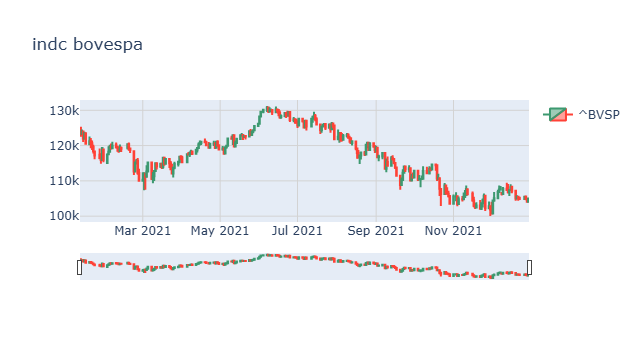

In [31]:
graph = {
    "x":bvsp.index,
    'open':bvsp.Open,
    'close':bvsp.Close,
    'high':bvsp.High,
    'low': bvsp.Low,
    'type': 'candlestick',
    'name': '^BVSP',
    "showlegend": True
}

from plotly import graph_objects
from plotly.graph_objs import Layout

grafico = graph_objects.Figure(
    data= [graph],
    layout_title='indc bovespa',)

grafico.update_xaxes(showgrid=True,gridwidth=1, gridcolor="LightGrey")
grafico.update_yaxes(showgrid=True,gridwidth=1, gridcolor="LightGrey")
grafico